In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
%matplotlib inline

In [2]:
eng_file_path="C:/Users/surajit/Documents/Working/ecosystem/Case Study - 1 Dataset/English"
eng_filenames=[]

with os.scandir(eng_file_path) as files:
    for i in files:
        eng_filenames.append(i)

In [3]:
jap_file_path="C:/Users/surajit/Documents/Working/ecosystem/Case Study - 1 Dataset/Japanese"
jap_filenames=[]

with os.scandir(jap_file_path) as files:
    for i in files:
        jap_filenames.append(i)

In [4]:
audio_files=[['English',eng_filenames]]+[['Japanese',jap_filenames]]

In [5]:
data,sr=librosa.load(audio_files[0][1][1])
len(data),sr

(41885, 22050)

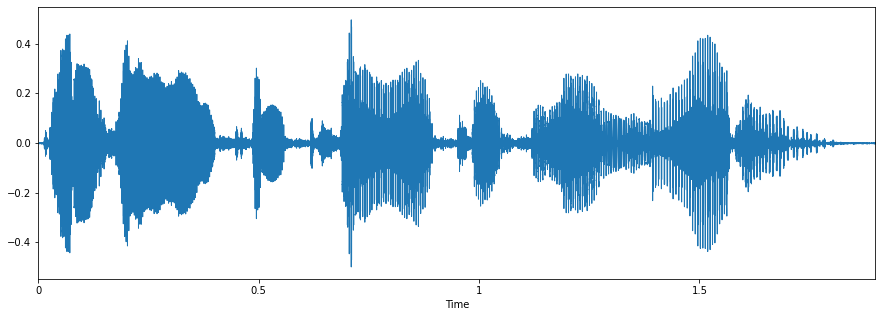

In [6]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sr=sr)
ipd.Audio(data,rate=sr)

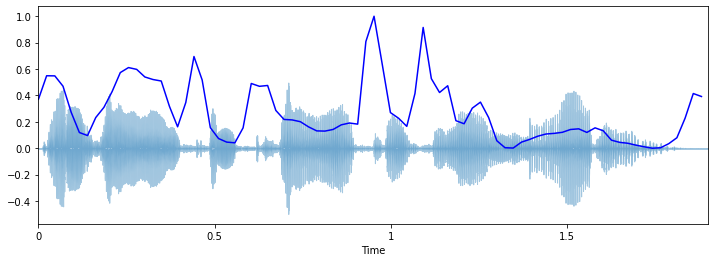

In [7]:
#t
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]

plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroids, axis=0), color='b')

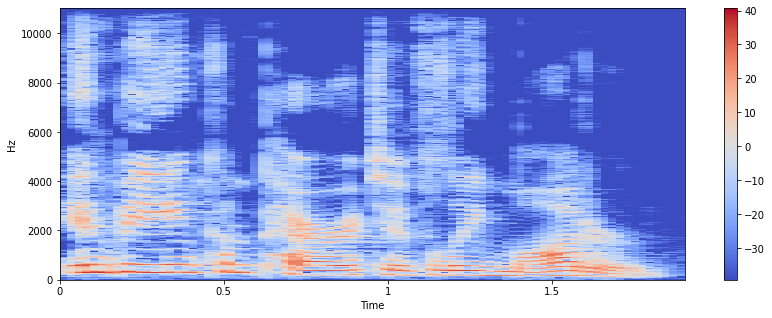

In [8]:
#SPECTOGRAMS
eng_spectogram = librosa.stft(data)
eng_spectogram= librosa.amplitude_to_db(abs(eng_spectogram))
plt.figure(figsize=(14, 5))
librosa.display.specshow(eng_spectogram, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
eng_mfcc=librosa.feature.mfcc(y=data, n_fft=2048, hop_length=512, n_mfcc=13,n_mels=128)
print(eng_mfcc.shape)
print(eng_mfcc)

(13, 82)
[[-347.7841    -218.67377   -140.93916   ... -513.7117    -527.34467
  -534.5671   ]
 [  77.45448     50.652733    50.37007   ...   85.13692     68.59735
    61.59765  ]
 [  26.056166     4.7448883  -10.786123  ...   40.971424    28.821762
    27.090258 ]
 ...
 [ -28.737415   -43.490616   -44.98861   ...  -14.131424    -8.746799
    -9.53994  ]
 [  18.509277    24.480099    29.470093  ...  -12.938095    -7.6830225
    -8.766842 ]
 [ -29.300163   -30.120205   -30.28501   ...   -5.2831454   -3.0814314
    -5.4878473]]


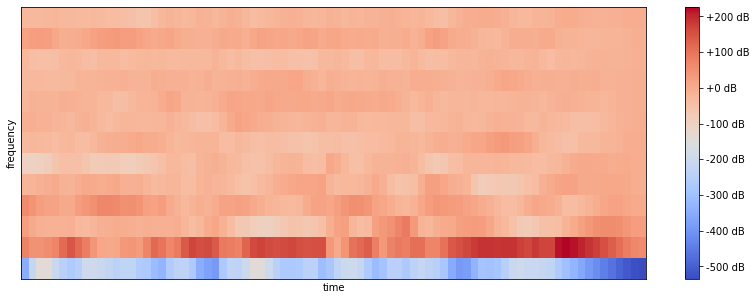

In [10]:
#MEL-SPECTOGRAMS
plt.figure(figsize=(14,5))
librosa.display.specshow(eng_mfcc,sr=sr,hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar(format='%+2.0f dB')
plt.show()

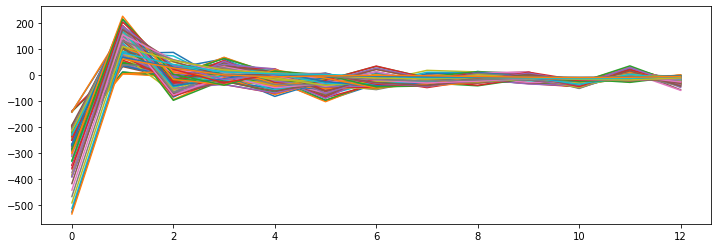

-25.270485 88.90372


In [11]:
plt.figure(figsize=(12,4))
plt.plot(eng_mfcc)
plt.show()
print(eng_mfcc.mean(),eng_mfcc.std())

C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


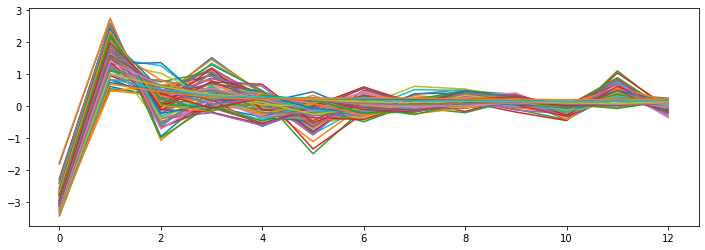

-3.5785153e-09 1.0


In [12]:
eng_mfcc = sklearn.preprocessing.scale(eng_mfcc)
plt.figure(figsize=(12,4))
plt.plot(eng_mfcc)
plt.show()
print(eng_mfcc.mean(),eng_mfcc.std())

In [13]:
jap_data,sr=librosa.load(audio_files[1][1][1])
len(jap_data),sr

(165000, 22050)

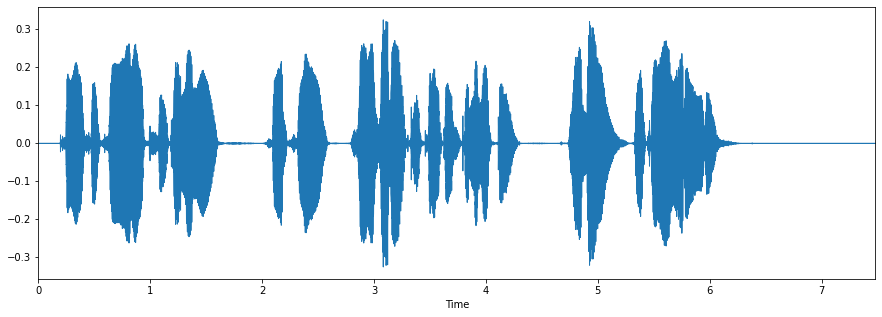

In [14]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(jap_data,sr=sr)
ipd.Audio(jap_data,rate=sr)

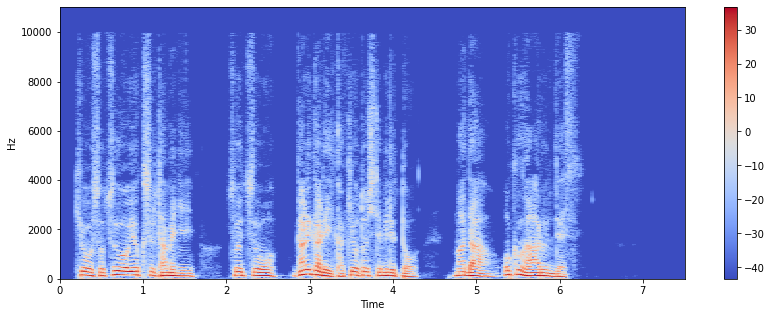

In [15]:
X = librosa.stft(jap_data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [16]:
jap_mfcc=librosa.feature.mfcc(y=jap_data, n_fft=2048, hop_length=512, n_mfcc=13,n_mels=128)
print(jap_mfcc.shape)
print(jap_mfcc)

(13, 323)
[[-632.08813 -632.08813 -632.08813 ... -632.08813 -632.08813 -632.08813]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]


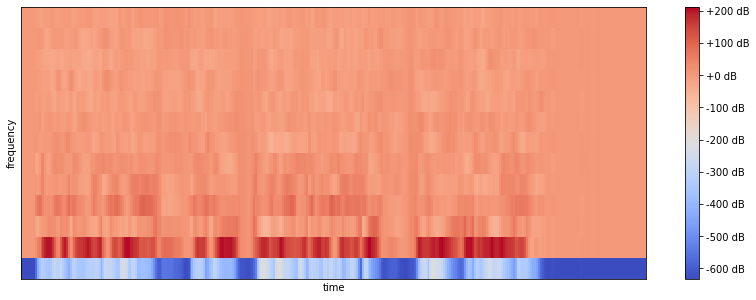

In [17]:
plt.figure(figsize=(14,5))
librosa.display.specshow(jap_mfcc,sr=sr,hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar(format='%+2.0f dB')
plt.show()

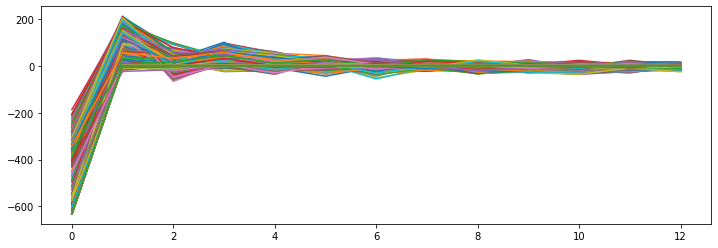

-23.044458 131.53961


In [18]:
plt.figure(figsize=(12,4))
plt.plot(jap_mfcc)
plt.show()
print(jap_mfcc.mean(),jap_mfcc.std())

C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


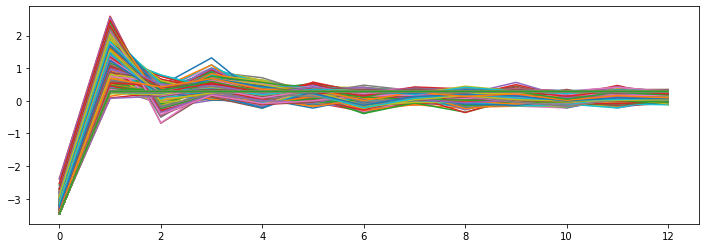

1.4535641e-08 0.99999994


In [19]:
jap_mfcc = sklearn.preprocessing.scale(jap_mfcc)
plt.figure(figsize=(12,4))
plt.plot(jap_mfcc)
plt.show()
print(jap_mfcc.mean(),jap_mfcc.std())

In [20]:
def load_data(filename):
    data,sr=librosa.load(filename)
    mfcc=librosa.feature.mfcc(y=data, n_fft=2048, hop_length=512, n_mfcc=13,n_mels=128)
    mfcc = sklearn.preprocessing.scale(mfcc)
    return mfcc   

In [21]:
data=[]
for i in range(len(audio_files)):
    language_class=audio_files[i][0]
    for j in range(len(audio_files[i][1])):
        file_coeff=load_data(audio_files[i][1][j])
        data.append([audio_files[i][1][j],file_coeff,language_class])
file_data= pd.DataFrame(data,columns=('filename','mfcc','language'))

C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarnin

C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical is

C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\surajit\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarnin

reshaping the file_data['mfcc']

In [22]:
max_shape=0
for i in range(len(file_data)):
    rows,shape2=file_data['mfcc'][i].shape
    if shape2>max_shape:
        max_shape=shape2
num=0
for i in range(len(file_data)):
    x1,x2=file_data['mfcc'][i].shape
    file_data['mfcc'][i]=file_data['mfcc'][i].tolist()
    if x2<max_shape:
        y=max_shape-x2
        for j in range(rows):
                file_data['mfcc'][i][j].extend([num for i in range(y)]) 

In [38]:
file_data.head()

,filename,mfcc,language
0,<DirEntry 'LJ001-0001.wav'>,"[[-3.2900397777557373, -3.2092177867889404, -2...",0
1,<DirEntry 'LJ001-0002.wav'>,"[[-3.120217800140381, -2.8375418186187744, -2....",0
2,<DirEntry 'LJ001-0003.wav'>,"[[-3.42258882522583, -3.1779558658599854, -2.6...",0
3,<DirEntry 'LJ001-0004.wav'>,"[[-3.3218936920166016, -3.3078527450561523, -2...",0
4,<DirEntry 'LJ001-0005.wav'>,"[[-3.2099668979644775, -3.097055673599243, -3....",0


In [ ]:
file_data['mfcc'][1]

In [23]:
df=file_data
le=LabelEncoder()
df['language']=le.fit_transform(np.array(file_data['language'].tolist()))

In [24]:
X=np.array(df['mfcc'].tolist())
Y=np.array(df['language'].tolist())

In [25]:
X=X.reshape(50,429,13)
X.shape

(50, 429, 13)

In [26]:
def splitting_data(test_size,validation_size):
    X_train,X_test,Y_train,y_test,=train_test_split(X,Y,test_size=0.2,random_state=50,shuffle=True)
    X_train,X_validation, Y_train, y_validation=train_test_split(X_train,Y_train,test_size=validation_size)
    X_train=X_train[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    return X_train,X_test,Y_train,y_test,X_validation,y_validation

In [27]:
def model_architecture(input_shape, loss, learning_rate):


    model = keras.models.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))


    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    keras.layers.Dropout(0.3)

    model.add(keras.layers.Dense(2, activation='softmax'))
    
    return model

In [28]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=patience)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [29]:
def predict(X_test):
    predict_classes= model.predict_classes(X_test)
    labels= le.inverse_transform(predict_classes) 
    return labels

In [30]:
test_size=0.2
validation_size=0.1 
X_train,X_test,Y_train,y_test,X_validation,y_validation=splitting_data(test_size, validation_size)

input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])
loss="sparse_categorical_crossentropy"
learning_rate=0.0001
model= model_architecture(input_shape,loss,learning_rate)

In [31]:
optimiser = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 427, 11, 64)       640       
_________________________________________________________________
batch_normalization (BatchNo (None, 427, 11, 64)       256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 214, 6, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 212, 4, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 212, 4, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 106, 2, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 1, 32)        4

In [32]:
epochs=20
batch_size=3
patience=5

train=train(model, epochs, batch_size, patience, X_train, Y_train, X_validation, y_validation)

Epoch 1/20
12/12 [==============================] - 1s 50ms/step - loss: 0.7448 - accuracy: 0.6389 - val_loss: 0.7695 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 0s 27ms/step - loss: 0.2262 - accuracy: 1.0000 - val_loss: 0.7868 - val_accuracy: 0.5000
Epoch 3/20
12/12 [==============================] - 0s 26ms/step - loss: 0.1485 - accuracy: 1.0000 - val_loss: 0.7999 - val_accuracy: 0.5000
Epoch 4/20
12/12 [==============================] - 0s 27ms/step - loss: 0.1004 - accuracy: 1.0000 - val_loss: 0.8143 - val_accuracy: 0.5000
Epoch 5/20
12/12 [==============================] - 0s 27ms/step - loss: 0.0956 - accuracy: 1.0000 - val_loss: 0.8319 - val_accuracy: 0.5000
Epoch 6/20
12/12 [==============================] - 0s 25ms/step - loss: 0.1042 - accuracy: 1.0000 - val_loss: 0.8499 - val_accuracy: 0.5000
Epoch 7/20
12/12 [==============================] - 0s 26ms/step - loss: 0.0862 - accuracy: 1.0000 - val_loss: 0.8750 - val_accuracy: 0.5000


In [34]:
train.history

{'loss': [0.7448056936264038,
  0.22618788480758667,
  0.14847025275230408,
  0.1003589779138565,
  0.09556863456964493,
  0.10421530157327652,
  0.08618064969778061],
 'accuracy': [0.6388888955116272, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.7694813013076782,
  0.7867595553398132,
  0.7998625040054321,
  0.8143362402915955,
  0.8319110870361328,
  0.8498653769493103,
  0.8750318884849548],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}

In [35]:
labels=predict(X_test)
print(labels)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
['Japanese' 'Japanese' 'Japanese' 'Japanese' 'Japanese' 'Japanese'
 'Japanese' 'Japanese' 'Japanese' 'Japanese']


In [36]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
accuracy

0.5

In [37]:
model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets
